# IST 652 FINAL PROJECT - ANALYSIS OF STARTUPS IN INDIA

- Kshitij Sankesara
- Rishabh Agarwal


In [1]:
#Importing necessary libraries for our analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import warnings
import itertools
plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [2]:
#Loading the 'startup funding' dataset
startup = pd.read_csv("startup_funding.csv")

In [3]:
#Viewing the dataset
startup

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
5,6,13/01/2020,Pando,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures,Series A,"90,00,000",NaN
6,7,10/01/2020,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,"15,00,00,000",NaN
7,8,12/12/2019,Ecozen,Technology,Agritech,Pune,Sathguru Catalyzer Advisors,Series A,"60,00,000",NaN
8,9,06/12/2019,CarDekho,E-Commerce,Automobile,Gurgaon,Ping An Global Voyager Fund,Series D,"7,00,00,000",NaN
9,10,03/12/2019,Dhruva Space,Aerospace,Satellite Communication,Bengaluru,"Mumbai Angels, Ravikanth Reddy",Seed,"5,00,00,000",NaN


In [4]:
#To know the number of rows and columns in our data set
startup.shape

(3044, 10)

In [5]:
#To get information like data types of each column of the dataset (2015-2020)
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
Sr No                3044 non-null int64
Date dd/mm/yyyy      3044 non-null object
Startup Name         3044 non-null object
Industry Vertical    2873 non-null object
SubVertical          2108 non-null object
City  Location       2864 non-null object
Investors Name       3020 non-null object
InvestmentnType      3040 non-null object
Amount in USD        2084 non-null object
Remarks              419 non-null object
dtypes: int64(1), object(9)
memory usage: 130.8+ KB


In [6]:
#Counting the count of null values in each column
startup.isnull().sum()

Sr No                   0
Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64

In [7]:
#Deleting Remarks column as the number of null values is very high
#Deleting Sr No column as it is insignificant for our analysis

del startup["Remarks"]
del startup["Sr No"]

In [8]:
#Replacing missing data in some of the columns with either 'Not Specified' or 'Other'

startup['Industry Vertical'] = startup['Industry Vertical'].fillna(value = 'Not Specified')
startup['SubVertical'] = startup['SubVertical'].fillna(value = 'Not Specified')
startup['City  Location'] = startup['City  Location'].fillna(value = 'Not Specified')
startup['Investors Name'] = startup['Investors Name'].fillna(value = 'Other')
startup['InvestmentnType'] = startup['InvestmentnType'].fillna(value = 'Other')

In [9]:
#Renaming some of the columns of the data set

startup = startup.rename(columns = {'Date dd/mm/yyyy':'Date', 'Startup Name':'Startup',\
                                    'Industry Vertical':'Industry', 'City  Location':'City',\
                                    'Investors Name':'Investor', 'InvestmentnType':'InvestmentType',\
                                    'Amount in USD':'Amount'})

In [10]:
#To check the number of unique values in each column
startup.nunique()

Date              1035
Startup           2459
Industry           822
SubVertical       1943
City               113
Investor          2413
InvestmentType      56
Amount             471
dtype: int64

In [11]:
#Removing the timestamp error in Date column
startup['Date'] = pd.to_datetime(startup['Date'], errors = 'coerce')

#Converting Date column to datetime type
startup['Date'] = pd.to_datetime(startup['Date'])



In [12]:
#Extracting Year and Month from the Date column
startup['Year'] = pd.DatetimeIndex(startup['Date']).year
startup['Month'] = pd.DatetimeIndex(startup['Date']).month

In [13]:
#To know the data types
startup.dtypes

Date              datetime64[ns]
Startup                   object
Industry                  object
SubVertical               object
City                      object
Investor                  object
InvestmentType            object
Amount                    object
Year                     float64
Month                    float64
dtype: object

In [14]:
#Filling the NAs and changing the data type of column Year from float to int
startup['Year'] = startup['Year'].fillna(0)
startup['Year'] = startup['Year'].astype('int')

#Filling the NAs and changing the data type of column Month from float to int
startup['Month'] = startup['Month'].fillna(0)
startup['Month'] = startup['Month'].astype('int')

In [15]:
#This might not run for the first time, but it will run when we run it for the second time!

#Filling NA values in Amount with the column's mean value
#Replacing all other values of columns with 0
#Changing the data type of column Amount 
#Replacing other values in column Amount

startup.loc[(startup.Amount == 'undisclosed'),'Amount']=0
startup.loc[(startup.Amount == 'unknown'),'Amount']=0
startup.loc[(startup.Amount == 'Undisclosed'),'Amount']=0
startup.loc[(startup.Amount == 'nan'),'Amount']=0
startup.loc[(startup.Amount == 'N/A'),'Amount']=0
startup.loc[(startup.Amount == '\\\\xc2\\\\xa0'),'Amount']=''
startup.loc[(startup.Amount == 'NA'),'Amount']=0
startup.loc[(startup.Amount == 'NaN'),'Amount']=0


startup["Amount"] = startup["Amount"].apply(lambda x: (str(x).replace(",","")))
startup["Amount"] = startup["Amount"].apply(lambda x: (str(x).replace("\\\\xc2\\\\xa0","")))
startup["Amount"] = startup["Amount"].apply(lambda x: (str(x).replace("+","")))
startup['Amount']=startup['Amount'].replace(0.0, np.NaN)
startup["Amount"] = pd.to_numeric(startup["Amount"],errors='coerce')

In [16]:
startup['Amount']=startup['Amount'].replace(0.0, np.NaN)

In [17]:
startup['Amount'].isnull().sum()


971

In [18]:
startup['Amount'].fillna((startup['Amount'].mean()), inplace=True)

In [19]:
#To get information like data types of each column of the dataset
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
Date              3036 non-null datetime64[ns]
Startup           3044 non-null object
Industry          3044 non-null object
SubVertical       3044 non-null object
City              3044 non-null object
Investor          3044 non-null object
InvestmentType    3044 non-null object
Amount            3044 non-null float64
Year              3044 non-null int32
Month             3044 non-null int32
dtypes: datetime64[ns](1), float64(1), int32(2), object(6)
memory usage: 142.7+ KB


In [20]:
#Describing the Amount columns using count, unique, top and frequency
startup["Amount"].describe()

count    3.044000e+03
mean     1.840034e+07
std      9.996179e+07
min      1.600000e+04
25%      1.000000e+06
50%      7.200000e+06
75%      1.840034e+07
max      3.900000e+09
Name: Amount, dtype: float64

In [21]:
#Knowing the unique values for Industry
startup.Industry.unique()

array(['E-Tech', 'Transportation', 'E-commerce', 'FinTech',
       'Fashion and Apparel', 'Logistics', 'Hospitality', 'Technology',
       'E-Commerce', 'Aerospace', 'B2B-focused foodtech startup',
       'Finance', 'Video', 'Gaming', 'Software', 'Health and wellness',
       'Education', 'Food and Beverage', 'Health and Wellness',
       'B2B Marketing', 'Video Games', 'SaaS', 'Last Mile Transportation',
       'Healthcare', 'Customer Service', 'B2B', 'Consumer Goods',
       'Advertising, Marketing', 'IoT', 'Information Technology',
       'Consumer Technology', 'Accounting', 'Retail',
       'Customer Service Platform', 'Automotive', 'EdTech', 'Services',
       'Compliance', 'Transport', 'Artificial Intelligence', 'Tech',
       'Health Care', 'Luxury Label', 'Waste Management Service',
       'Deep-Tech', 'Agriculture', 'Energy', 'Digital Media', 'Saas',
       'Automobile', 'Agtech', 'Social Media', 'Fintech', 'Edtech', 'AI',
       'Ecommerce', 'Nanotechnology', 'Services Platfo

In [22]:
#Cleaning the Industry column extensively

startup["Industry"] = startup["Industry"].map(lambda x: x.lstrip('\\\\xc2\\\\xa0'))
startup["Industry"]= startup["Industry"].replace("E-Commerce", "E-commerce")
startup["Industry"]= startup["Industry"].replace("Ecommerce", "E-commerce")
startup["Industry"]= startup["Industry"].replace("ECommerce", "E-commerce")
startup["Industry"]= startup["Industry"].replace("ecommerce", "E-commerce")
startup["Industry"]= startup["Industry"].replace("eCommerce", "E-commerce")
startup["Industry"]= startup["Industry"].replace("eCommece", "E-commerce")
startup["Industry"]= startup["Industry"].replace("Hyperlocal\\\\xc2\\\\xa0 Grocery Delivery Service", "Hyperlocal Grocery Delivery Service")
startup["Industry"]= startup["Industry"].replace("WiFi \\xe2\\x80\\x93 first Cloud communication platform", "WiFi first Cloud communication platform")
startup["Industry"]= startup["Industry"].replace("Mobile Growth Hacking\\\\nPlatform", "Mobile Growth Hacking Platform")
startup["Industry"]= startup["Industry"].replace("Women Ethnic Wear\\\\xc2\\\\xa0 Online Marketplace", "Women Ethnic Wear Online Marketplace")
startup["Industry"]= startup["Industry"].replace("Location based Nightlife recommendation\\\\xc2\\\\xa0 Platform", "Location based Nightlife recommendation Platform")
startup["Industry"]= startup["Industry"].replace("Luxury goods\\\\xc2\\\\xa0 Shopping Platform", "Luxury goods Shopping Platform")
startup["Industry"]= startup["Industry"].replace("ECommerce Brands\\\\xe2\\\\x80\\\\x99 Full Service Agency", "E-commerce Brands Full Service Agency")
startup["Industry"]= startup["Industry"].replace("Chain of Tea Caf\\\\xc3\\\\xa9\\\\xe2\\\\x80\\\\x99s", "Chain of Tea Cafes")
startup["Industry"]= startup["Industry"].replace("App security\\\\xc2\\\\xa0testing platform", "App security testing platform")
startup["Industry"]= startup["Industry"].replace("Home Design & D\\\\xc3\\\\xa9cor solutions", "Home Design & Decor solutions")
startup["Industry"]= startup["Industry"].replace("Home Design & D\\\\xc3\\\\xa9cor platform", "Home Design & Decor solutions")
startup["Industry"]= startup["Industry"].replace("Online home d\\\\xc3\\\\xa9cor marketplace", "Online home decor marketplace")
startup["Industry"]= startup["Industry"].replace("Healthcare\\\\nService provider", "Healthcare Service provider")
startup["Industry"]= startup["Industry"].replace("Online Home D\\\\xc3\\\\xa9cor", "Online home decor marketplace")
startup["Industry"]= startup["Industry"].replace("Online Furnishing\\\\neCommerce", "Online Furnishing E-commerce")
startup["Industry"]= startup["Industry"].replace("Interactive\\\\xc2\\\\xa0 How-To Guides", "Interactive How-To Guides")
startup["Industry"]= startup["Industry"].replace("OnDemand\\\\nMobile Handyman Services", "On Demand Mobile Handyman Services")

In [23]:
#Knowing the unique values for Cities
startup.City.unique()

array(['Bengaluru', 'Gurgaon', 'New Delhi', 'Mumbai', 'Chennai', 'Pune',
       'Noida', 'Faridabad', 'San Francisco', 'San Jose,', 'Amritsar',
       'Delhi', 'Kormangala', 'Tulangan', 'Hyderabad', 'Burnsville',
       'Menlo Park', 'Gurugram', 'Palo Alto', 'Santa Monica', 'Singapore',
       'Taramani', 'Andheri', 'Chembur', 'Nairobi', 'Haryana', 'New York',
       'Karnataka', 'Mumbai/Bengaluru', 'Bhopal',
       'Bengaluru and Gurugram', 'India/Singapore', 'Jaipur', 'India/US',
       'Nagpur', 'Indore', 'New York, Bengaluru', 'California', 'India',
       'Ahemadabad', 'Rourkela', 'Srinagar', 'Bhubneswar', 'Chandigarh',
       'Delhi & Cambridge', 'Kolkatta', 'Kolkata', 'Coimbatore',
       'Bangalore', 'Udaipur', 'Not Specified', 'Ahemdabad',
       'Bhubaneswar', 'Ahmedabad', 'Surat', 'Goa', 'Uttar Pradesh',
       'Nw Delhi', 'Gaya', 'Vadodara', 'Trivandrum', 'Missourie',
       'Panaji', 'Gwalior', 'Karur', 'Udupi', 'Kochi', 'Agra',
       'Bangalore/ Bangkok', 'Hubli', 'Keral

In [24]:
#Since Bangalore and Bengaluru is same, We are replacing Bengaluru with Bangalore
#We are doing the same for other cities and places as well

startup["City"] = startup["City"].replace("Bengaluru", "Bangalore")
startup["City"] = startup["City"].replace("Kormangala", "Bangalore")
startup["City"] = startup["City"].replace("Andheri", "Mumbai")
startup["City"] = startup["City"].replace("Chembur", "Mumbai")
startup["City"] = startup["City"].replace("Tulangan", "Hyderabdad")
startup["City"]= startup["City"].replace("Kolkatta", "Kolkata")
startup["City"]= startup["City"].replace("Panaji", "Goa")
startup["City"] = startup["City"].replace("Delhi", "New Delhi")
startup["City"]= startup["City"].replace("Nw Delhi", "New Delhi")


#Stripping some part of the string as they dont make sense
startup['City'] = startup['City'].apply(lambda x: (str(x).replace(' / US','')))
startup['City'] = startup['City'].apply(lambda x: (str(x).replace(' / USA','')))
startup['City'] = startup['City'].apply(lambda x: (str(x).replace('/US','')))
startup['City'] = startup['City'].apply(lambda x: (str(x).replace(' / Global','')))
startup["City"] = startup["City"].map(lambda x: x.lstrip('\\\\xc2\\\\xa0'))

In [25]:
#We are doing it for all the cities to clean the City column extensively

startup["City"]= startup["City"].replace("BangaloreA", "Bangalore")
startup["City"]= startup["City"].replace("US", "USA")
startup["City"]= startup["City"].replace("HyderabadA", "Hyderabad")
startup['City'] = startup['City'].apply(lambda x: (str(x).replace(' / California','')))
startup['City'] = startup['City'].apply(lambda x: (str(x).replace(' / SFO','')))
startup['City'] = startup['City'].apply(lambda x: (str(x).replace(' / Singapore','')))
startup['City'] = startup['City'].apply(lambda x: (str(x).replace('SFO / ','')))
startup['City'] = startup['City'].apply(lambda x: (str(x).replace(' / Dubai','')))
startup['City'] = startup['City'].apply(lambda x: (str(x).replace('Dallas / ','')))
startup['City'] = startup['City'].apply(lambda x: (str(x).replace('/ Houston','')))
startup['City'] = startup['City'].apply(lambda x: (str(x).replace('New York, ','')))
startup['City'] = startup['City'].apply(lambda x: (str(x).replace('/ Bangkok','')))
startup['City'] = startup['City'].apply(lambda x: (str(x).replace('/ Singapore','')))
startup['City'] = startup['City'].apply(lambda x: (str(x).replace(' / UK','')))
startup['City'] = startup['City'].apply(lambda x: (str(x).replace('Seattle / ','')))
startup['City'] = startup['City'].apply(lambda x: (str(x).replace(' / San Mateo','')))
startup['City'] = startup['City'].apply(lambda x: (str(x).replace('/Singapore','')))
startup['City'] = startup['City'].apply(lambda x: (str(x).replace('/Seattle','')))
startup['City'] = startup['City'].apply(lambda x: (str(x).replace(' & Cambridge','')))
startup['City'] = startup['City'].apply(lambda x: (str(x).replace('US/India','USA/India')))
startup['City'] = startup['City'].apply(lambda x: (str(x).replace(' / NY','')))
startup['City'] = startup['City'].apply(lambda x: (str(x).replace(' / Palo Alto','')))
startup['City'] = startup['City'].apply(lambda x: (str(x).replace(' and Gurugram','')))
startup['City'] = startup['City'].apply(lambda x: (str(x).replace(' / NY','')))
startup['City'] = startup['City'].apply(lambda x: (str(x).replace('New York/ ','')))
startup["City"] = startup["City"].replace("Bengaluru", "Bangalore")
startup["City"] = startup["City"].replace("San Francisco", "California")
startup["City"] = startup["City"].replace("San Jose,", "California")
startup["City"] = startup["City"].replace("Menlo Park", "California")
startup["City"] = startup["City"].replace("Santa Monica", "California")
startup["City"] = startup["City"].replace("Palo Alto", "California")
startup["City"] = startup["City"].replace("Delhi", "New Delhi")
startup["City"] = startup["City"].replace("Ahemdabad", "Ahemadabad")
startup["City"] = startup["City"].replace("Gurugram", "Gurgaon")

In [26]:
#Removing rows with Year value 0
startup = startup[startup.Year != 0]

In [27]:
#Cleaning the InvestmentType column
#Replacing the values which have the same meaning
#Replacing special characters in the column which doesn't make sense

startup["InvestmentType"]= startup["InvestmentType"].replace("Private Equity Round", "Private Equity")
startup["InvestmentType"]= startup["InvestmentType"].replace("PrivateEquity", "Private Equity")
startup["InvestmentType"]= startup["InvestmentType"].replace("Private\\\\nEquity", "Private Equity")
startup["InvestmentType"]= startup["InvestmentType"].replace("Private", "Private Equity")
startup["InvestmentType"]= startup["InvestmentType"].replace("Private Funding", "Private Equity")

startup["InvestmentType"]= startup["InvestmentType"].replace("Seed / Angel Funding", "Seed/Angel Funding")
startup["InvestmentType"]= startup["InvestmentType"].replace("Seed / Angle Funding", "Seed/Angel Funding")
startup["InvestmentType"]= startup["InvestmentType"].replace("Seed/ Angel Funding", "Seed/Angel Funding")
startup["InvestmentType"]= startup["InvestmentType"].replace("Angel / Seed Funding", "Seed/Angel Funding")

startup["InvestmentType"]= startup["InvestmentType"].replace("pre-Series A", "Pre-series A")
startup["InvestmentType"]= startup["InvestmentType"].replace("Pre-Series A", "Pre-series A")
startup["InvestmentType"]= startup["InvestmentType"].replace("pre-series A", "Pre-series A")
startup["InvestmentType"]= startup["InvestmentType"].replace("Pre Series A", "Pre-series A")

startup["InvestmentType"]= startup["InvestmentType"].replace("Angel", "Angel Round")
startup["InvestmentType"]= startup["InvestmentType"].replace("Angel Funding", "Angel Round")

startup["InvestmentType"]= startup["InvestmentType"].replace("Crowd funding", "Crowd Funding")
startup["InvestmentType"]= startup["InvestmentType"].replace("Crowd funding", "Crowd Funding")

startup["InvestmentType"]= startup["InvestmentType"].replace("Seed Funding Round", "Seed Round")
startup["InvestmentType"]= startup["InvestmentType"].replace("Seed\\\\nFunding", "Seed Round")
startup["InvestmentType"]= startup["InvestmentType"].replace("Seed", "Seed Round")
startup["InvestmentType"]= startup["InvestmentType"].replace("Seed funding", "Seed Round")
startup["InvestmentType"]= startup["InvestmentType"].replace("Seed Funding", "Seed Round")


startup["InvestmentType"]= startup["InvestmentType"].replace("Debt", "Debt Funding")
startup["InvestmentType"]= startup["InvestmentType"].replace("Debt-Funding", "Debt Funding")

startup["InvestmentType"]= startup["InvestmentType"].replace("Equity", "Equity Based Funding")

startup["InvestmentType"]= startup["InvestmentType"].replace("Single Venture", "Venture Round")
startup["InvestmentType"]= startup["InvestmentType"].replace("Venture", "Venture Round")

In [28]:
#Answering Business Questions

In [86]:
#Startup name with highest funding
#Grouping by Startup and showing the Industry and sum of Amount for each startup
#Sorting values based on sum of Amount (Descending)

A = startup.groupby(["Startup", "Industry"], as_index = False)["Amount"].sum()    
A = A.sort_values(["Amount"], ascending = False).reset_index()
A.head()

,index,Startup,Industry,Amount
0,778,Flipkart,E-commerce,4.009700e+09
1,1897,Rapido Bike Taxi,Transportation,3.900000e+09
2,1733,Paytm,E-commerce,1.460000e+09
3,1734,Paytm,FinTech,1.000000e+09
4,780,Flipkart.com,Online Marketplace,7.000000e+08


In [85]:
#Cities with most fundings between 2015-2020
B = startup.groupby(["City"], as_index = False)["Amount"].sum()
B = B.sort_values(["Amount"], ascending = False)
B.head()

,City,Amount
4,Bangalore,2.358630e+10
39,Mumbai,8.002922e+09
43,New Delhi,6.921538e+09
19,Gurgaon,5.681347e+09
46,Not Specified,2.099029e+09


In [31]:
#Funding amount recieved per year 2015-2020
C = startup.groupby(["Year"], as_index = False)["Amount"].sum()
C = C.sort_values(["Amount"], ascending = False)
C

,Year,Amount
2,2017,1.467979e+10
0,2015,1.383894e+10
1,2016,1.131703e+10
4,2019,9.811321e+09
3,2018,5.944134e+09
5,2020,3.902073e+08


In [32]:
#Grouping data by Industry and SubVertical
D = startup.groupby(['Industry', 'SubVertical'], as_index = False)["Amount"].sum()
D = D.sort_values(["Amount"], ascending = False)
D.head(15)

,Industry,SubVertical,Amount
2616,Transportation,Bike Taxi,3.900000e+09
1212,E-commerce,Online Marketplace,2.538700e+09
1837,Not Specified,Not Specified,1.966975e+09
1101,E-commerce,ECommerce Marketplace,1.700000e+09
1174,E-commerce,Mobile Wallet & ECommerce platform,1.460000e+09
1429,FinTech,Mobile Wallet,1.000000e+09
1927,Online Marketplace,Not Specified,7.000000e+08
1049,E-Commerce & M-Commerce platform,Not Specified,6.800000e+08
1470,Finance,Private Equity Firm,6.000000e+08
39,B2B,Business development,5.850000e+08


In [33]:
#Knowing the investors which invests the highest amount and year of funding

E = startup.groupby(['Investor', 'Industry'], as_index = False)["Amount"].sum()
E = E.sort_values(["Amount"], ascending = False)
E.head(10)

,Investor,Industry,Amount
2684,Westbridge Capital,Transportation,3.900000e+09
2227,Softbank,E-commerce,2.500000e+09
2217,SoftBank Group,E-commerce,1.400000e+09
1469,"Microsoft, eBay, Tencent Holdings",E-commerce,1.400000e+09
2629,Vijay Shekhar Sharma,FinTech,1.000000e+09
2267,Steadview Capital and existing investors,Online Marketplace,7.000000e+08
147,"Alibaba Group, Ant Financial",E-Commerce & M-Commerce platform,6.800000e+08
1664,Other,Finance,6.070500e+08
165,"Altimeter Capital, DST Global",B2B,5.850000e+08
149,"Alibaba, Foxconn, Softbank",Ecommerce Marketplace,5.000000e+08


In [34]:
#To know the Investment type which has the highest investments between 2015-2020

F = startup.groupby(['InvestmentType'], as_index = False)["Amount"].sum()
F = F.sort_values(["Amount"], ascending = False)
print(F)

                 InvestmentType        Amount
13               Private Equity  3.250310e+10
14                   Seed Round  1.269376e+10
17                     Series B  4.799196e+09
20                     Series D  1.481799e+09
19                     Series C  1.044718e+09
7                 Funding Round  1.000000e+09
15           Seed/Angel Funding  7.961067e+08
16                     Series A  2.400007e+08
23                     Series G  2.310000e+08
11                        Other  2.260294e+08
4                  Debt Funding  1.886627e+08
29                Venture Round  1.784003e+08
24                     Series H  1.500000e+08
6          Equity Based Funding  1.320000e+08
22                     Series F  9.000000e+07
12                 Pre-series A  6.277234e+07
2               Corporate Round  5.648034e+07
21                     Series E  3.300000e+07
0                   Angel Round  1.886495e+07
1                  Bridge Round  1.840034e+07
26              Structured Debt  8

In [35]:
#Average amount of funding received by Indian startups
print("On Average, Indian startups got funding of: ", round(startup["Amount"].mean(),))

On Average, Indian startups got funding of:  18439203


<BarContainer object of 3036 artists>

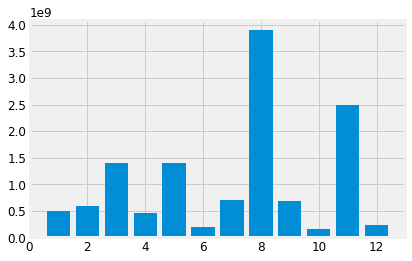

In [36]:
#Bar plot to check in which month the fundings were given
plt.bar(x = "Month", height = "Amount", data = startup)

Consumer Internet    940
Technology           478
E-commerce           300
Not Specified        169
Healthcare            70
Finance               62
Logistics             32
Education             24
Food & Beverage       23
Ed-Tech               14
Name: Industry, dtype: int64


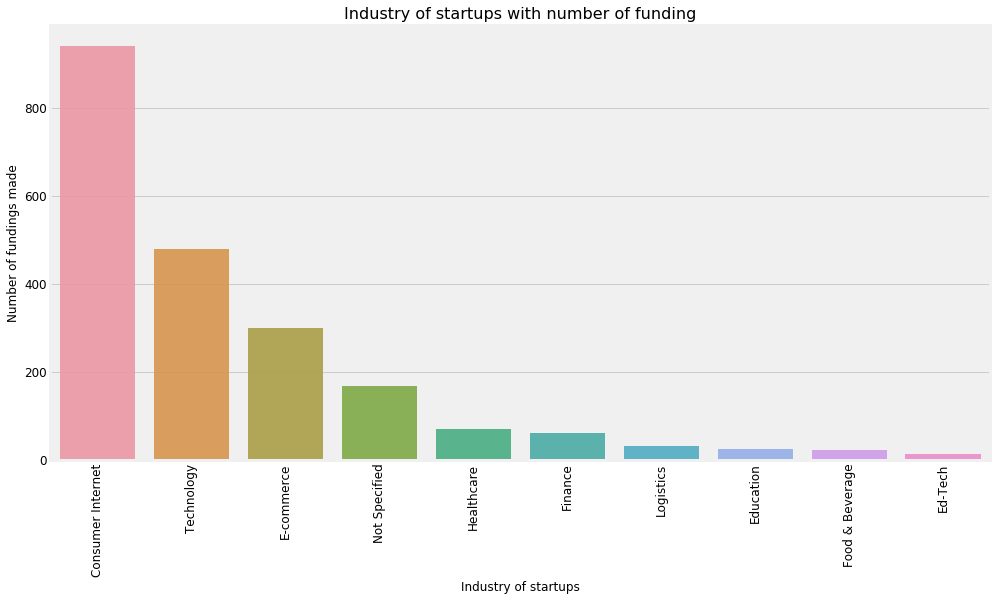

In [37]:
#To see the number of fundings each Industry received
industry = startup['Industry'].value_counts().head(10)
print(industry)

plt.figure(figsize=(15,8))
sns.barplot(industry.index, industry.values, alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel('Industry of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Industry of startups with number of funding", fontsize=16)
plt.show()

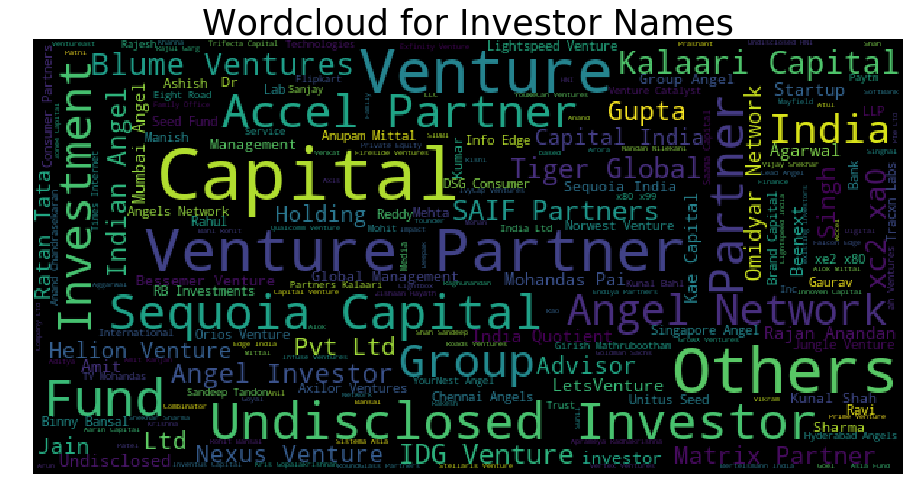

In [38]:
#Word cloud showing Investors Name

names = startup["Investor"][~pd.isnull(startup["Investor"])]
wordcloud = WordCloud(max_font_size=50, width=600, height=300).generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Wordcloud for Investor Names", fontsize=35)
plt.axis("off")
plt.show()

Seed Round            1391
Private Equity        1363
Seed/Angel Funding     141
Debt Funding            27
Series A                24
Name: InvestmentType, dtype: int64


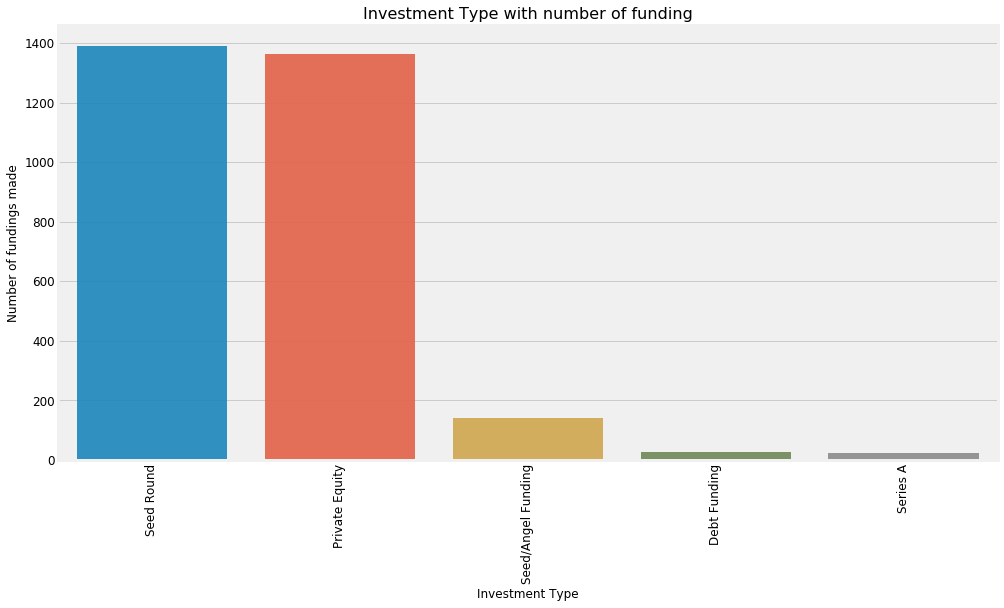

In [39]:
#Type of investments getting the most number of fundings
investment = startup['InvestmentType'].value_counts().head(5)
print(investment)

plt.figure(figsize=(15,8))
sns.barplot(investment.index, investment.values, alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel('Investment Type', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investment Type with number of funding", fontsize=16)
plt.show()

In [40]:
#Correlation matrix
#It shows how dependent variables are to each other

corr = startup.corr()
corr.style.background_gradient(cmap='coolwarm')

,Amount,Year,Month
Amount,1,0.08884,0.0146318
Year,0.08884,1,-0.0700801
Month,0.0146318,-0.0700801,1


In [41]:
#Regression Model

In [42]:
#Viewing the data set
startup.head()

#Here, we can use only the Amount (Y variable), Year and Month (X Variables) for our Linear Regression Model
#All other are non numerical variables
#There are many unique values in each column so we can't convert them to numerical values

,Date,Startup,Industry,SubVertical,City,Investor,InvestmentType,Amount,Year,Month
0,2020-09-01,BYJU’S,E-Tech,E-learning,Bangalore,Tiger Global Management,Private Equity,200000000.0,2020,9
1,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,2020,1
2,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Series B,18358860.0,2020,9
3,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,2020,2
4,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,2020,2


In [43]:
#Time Series Model

In [44]:
#Indexing the Date column

date = startup.set_index('Date')
date.index

DatetimeIndex(['2020-09-01', '2020-01-13', '2020-09-01', '2020-02-01',
               '2020-02-01', '2020-01-13', '2020-10-01', '2019-12-12',
               '2019-06-12', '2019-03-12',
               ...
               '2015-01-24', '2015-01-24', '2015-01-25', '2015-01-27',
               '2015-01-28', '2015-01-29', '2015-01-29', '2015-01-30',
               '2015-01-30', '2015-01-31'],
              dtype='datetime64[ns]', name='Date', length=3036, freq=None)

In [45]:
#Assigning Amount column to y variable
y = date['Amount'].resample('MS').mean()

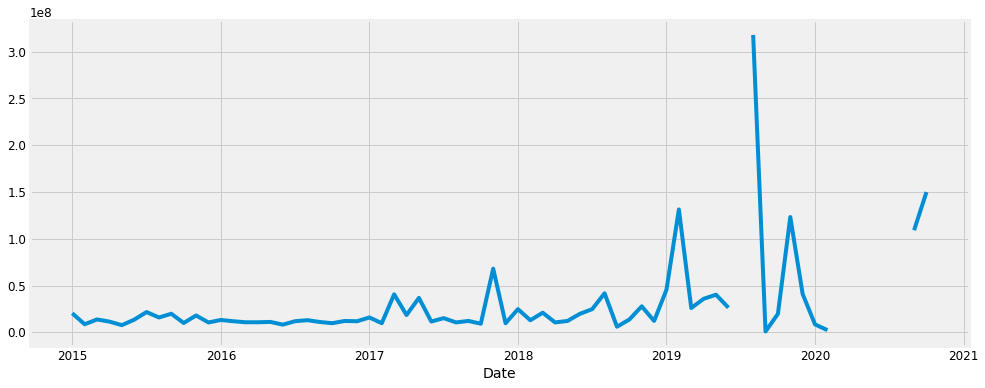

In [46]:
#Plotting the time-series graph (2015-2020)

#We can see an increase in Amount funded over the years.
#We do not have proper data for the year 2020 so the graph is breaking

y.plot(figsize=(15, 6))
plt.show()

In [47]:
#Analyzing another dataset extracted from Crunchbase which has originally 36 columns and 849 rows. It primarily focuses on the 
#amount of funding received at each round.

new=pd.read_csv("ne.csv",encoding = 'unicode_escape')

In [48]:
new

,name,market,funding_total_usd,status,country_code,region,city,funding_rounds,founded_at,founded_month,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,1CLICK,Chat,NA,operating,IND,Bangalore,Bangalore,1,11/1/2012,2012-11,...,0,0,0,0,0,0,0,0,0,0
1,21Diamonds,E-Commerce,6369507,operating,IND,New Delhi,Gurgaon,1,6/1/2012,2012-06,...,0,0,0,0,6369507,0,0,0,0,0
2,24x7 Learning,Education,4000000,operating,IND,Bangalore,Bangalore,1,1/1/2001,2001-01,...,0,0,0,0,0,0,0,0,0,0
3,3DSoC,Mobile,2065000,operating,IND,Bangalore,Bangalore,2,6/1/2006,2006-06,...,0,0,1240000,825000,0,0,0,0,0,0
4,91Mobiles,Mobile,1000000,operating,IND,New Delhi,Gurgaon,1,1/1/2010,2010-01,...,0,0,1000000,0,0,0,0,0,0,0
5,99Presents,E-Commerce,"20,000",operating,IND,Vadodara,Vadodara,1,3/20/2012,2012-03,...,0,0,0,0,0,0,0,0,0,0
6,99tests,Software,210000,operating,IND,Bangalore,Bangalore,3,2/14/2011,2011-02,...,0,0,0,0,0,0,0,0,0,0
7,A LITTLE WORLD,Finance,6410000,operating,IND,Mumbai,Mumbai,1,3/2/2000,2000-03,...,0,0,0,6410000,0,0,0,0,0,0
8,A.P Avanashiappa Silk,Retail,"96,932",operating,IND,IND - Other,Tirupur,2,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
9,ABC Live,Advertising,"25,000",closed,IND,Chandigarh,Chandigarh,1,12/5/2007,2007-12,...,0,0,0,0,0,0,0,0,0,0


In [49]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849 entries, 0 to 848
Data columns (total 36 columns):
name                    849 non-null object
market                  816 non-null object
funding_total_usd       849 non-null object
status                  832 non-null object
country_code            849 non-null object
region                  849 non-null object
city                    844 non-null object
funding_rounds          849 non-null int64
founded_at              683 non-null object
founded_month           682 non-null object
found_quarter           682 non-null float64
founded_quarter         682 non-null object
founded_year            682 non-null float64
first_funding_at        849 non-null object
last_funding_at         849 non-null object
seed                    849 non-null int64
venture                 849 non-null int64
equity_crowdfunding     849 non-null int64
undisclosed             849 non-null int64
convertible_note        849 non-null int64
debt_financing     

In [50]:
new.isna().sum()

name                      0
market                   33
funding_total_usd         0
status                   17
country_code              0
region                    0
city                      5
funding_rounds            0
founded_at              166
founded_month           167
found_quarter           167
founded_quarter         167
founded_year            167
first_funding_at          0
last_funding_at           0
seed                      0
venture                   0
equity_crowdfunding       0
undisclosed               0
convertible_note          0
debt_financing            0
angel                     0
grant                     0
private_equity            0
post_ipo_equity           0
post_ipo_debt             0
secondary_market          0
product_crowdfunding      0
round_A                   0
round_B                   0
round_C                   0
round_D                   0
round_E                   0
round_F                   0
round_G                   0
round_H             

In [51]:
#deleting the redundant columns
del new['country_code']
del new['founded_quarter']

In [52]:
new.head()

,name,market,funding_total_usd,status,region,city,funding_rounds,founded_at,founded_month,found_quarter,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,1CLICK,Chat,NA,operating,Bangalore,Bangalore,1,11/1/2012,2012-11,4.0,...,0,0,0,0,0,0,0,0,0,0
1,21Diamonds,E-Commerce,6369507,operating,New Delhi,Gurgaon,1,6/1/2012,2012-06,2.0,...,0,0,0,0,6369507,0,0,0,0,0
2,24x7 Learning,Education,4000000,operating,Bangalore,Bangalore,1,1/1/2001,2001-01,1.0,...,0,0,0,0,0,0,0,0,0,0
3,3DSoC,Mobile,2065000,operating,Bangalore,Bangalore,2,6/1/2006,2006-06,2.0,...,0,0,1240000,825000,0,0,0,0,0,0
4,91Mobiles,Mobile,1000000,operating,New Delhi,Gurgaon,1,1/1/2010,2010-01,1.0,...,0,0,1000000,0,0,0,0,0,0,0


In [53]:
#renaming the columns 
new.columns=['name','segment','amount_raised','status','region','city','funding_rounds','founded_at','founded_month','founded_quarter','founded_year','first_funding_at','lastfunding','seed','venture','equity_crowdfunding','undisclosed','convertible_note','debt_financing','angel','grant','private_equity','post_ipo_equity','post_ipo_debt','secondary_market','product_crowdfunding','round_A','round_B','round_C','round_D','round_E','round_F','round_G','round_H']


In [54]:
#summary statistics of attributes (1999-2014)
new.describe()

,funding_rounds,founded_quarter,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
count,849.000000,682.000000,682.000000,8.490000e+02,8.490000e+02,849.000000,8.490000e+02,8.490000e+02,8.490000e+02,8.490000e+02,...,849.000000,849.000000,8.490000e+02,8.490000e+02,8.490000e+02,8.490000e+02,8.490000e+02,8.490000e+02,8.490000e+02,8.490000e+02
mean,1.399293,1.668622,2008.043988,1.133899e+05,1.016131e+07,9.422850,1.654338e+05,5.219081e+03,3.203971e+06,4.414723e+04,...,247.349823,294.464075,7.677422e+05,1.333212e+06,7.926307e+05,8.951708e+05,7.184923e+05,5.108363e+05,1.248528e+06,7.067138e+05
std,0.916077,1.033299,6.752895,4.500862e+05,8.345706e+07,274.559289,4.064864e+06,1.008662e+05,7.841342e+07,2.392543e+05,...,7207.181342,7073.267504,2.796177e+06,5.572386e+06,4.534834e+06,9.969931e+06,1.289506e+07,9.076077e+06,3.437921e+07,2.059195e+07
min,1.000000,1.000000,1938.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000,1.000000,2007.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000,1.000000,2010.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.000000,2.000000,2012.000000,0.000000e+00,5.500000e+06,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,11.000000,4.000000,2014.000000,5.000000e+06,2.351000e+09,8000.000000,1.169833e+08,2.225000e+06,2.250000e+09,3.400000e+06,...,210000.000000,200000.000000,4.500000e+07,9.250000e+07,6.500000e+07,2.100000e+08,3.600000e+08,2.100000e+08,1.000000e+09,6.000000e+08


In [55]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849 entries, 0 to 848
Data columns (total 34 columns):
name                    849 non-null object
segment                 816 non-null object
amount_raised           849 non-null object
status                  832 non-null object
region                  849 non-null object
city                    844 non-null object
funding_rounds          849 non-null int64
founded_at              683 non-null object
founded_month           682 non-null object
founded_quarter         682 non-null float64
founded_year            682 non-null float64
first_funding_at        849 non-null object
lastfunding             849 non-null object
seed                    849 non-null int64
venture                 849 non-null int64
equity_crowdfunding     849 non-null int64
undisclosed             849 non-null int64
convertible_note        849 non-null int64
debt_financing          849 non-null int64
angel                   849 non-null int64
grant                

In [56]:
#chnaging the NA to np.NaN and converting it from object to numeric
new['amount_raised']=new['amount_raised'].replace('NA', np.NaN)
new["amount_raised"]= pd.to_numeric(new["amount_raised"],errors='coerce')

In [57]:
#replacing the NA values with the mean value
new['amount_raised'].fillna((new['amount_raised'].mean()), inplace=True)

In [58]:
#converting it from float to integer
new['amount_raised'].astype('int').head()

0    27042790
1     6369507
2     4000000
3     2065000
4     1000000
Name: amount_raised, dtype: int32

In [59]:
new.head()

,name,segment,amount_raised,status,region,city,funding_rounds,founded_at,founded_month,founded_quarter,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,1CLICK,Chat,2.704279e+07,operating,Bangalore,Bangalore,1,11/1/2012,2012-11,4.0,...,0,0,0,0,0,0,0,0,0,0
1,21Diamonds,E-Commerce,6.369507e+06,operating,New Delhi,Gurgaon,1,6/1/2012,2012-06,2.0,...,0,0,0,0,6369507,0,0,0,0,0
2,24x7 Learning,Education,4.000000e+06,operating,Bangalore,Bangalore,1,1/1/2001,2001-01,1.0,...,0,0,0,0,0,0,0,0,0,0
3,3DSoC,Mobile,2.065000e+06,operating,Bangalore,Bangalore,2,6/1/2006,2006-06,2.0,...,0,0,1240000,825000,0,0,0,0,0,0
4,91Mobiles,Mobile,1.000000e+06,operating,New Delhi,Gurgaon,1,1/1/2010,2010-01,1.0,...,0,0,1000000,0,0,0,0,0,0,0


In [60]:
#converting the date columns from object to datetime

new['founded_at'] = pd.to_datetime(new['founded_at'], errors = 'coerce')
new['first_funding_at'] = pd.to_datetime(new['first_funding_at'], errors = 'coerce')
new['lastfunding'] = pd.to_datetime(new['lastfunding'], errors = 'coerce')




In [61]:
#extracting the month and year from the first_funding_at column

new['first_funding_year'] = pd.DatetimeIndex(new['first_funding_at']).year
new['first_funding_month'] = pd.DatetimeIndex(new['first_funding_at']).month

In [62]:
#correlation matrix

cor1=new.corr()
cor1.style.background_gradient(cmap='coolwarm')

,amount_raised,funding_rounds,founded_quarter,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,first_funding_year,first_funding_month
amount_raised,1,0.374068,0.00963541,-0.0344724,-0.0410468,0.703245,6.69013e-19,0.0597425,-0.00860275,0.641199,-0.0201812,-0.00032503,0.332997,0.0611329,nan,-0.0053226,-0.00740867,0.0425918,0.143369,0.153452,0.483985,0.700466,0.690176,0.662753,0.661015,-0.0272024,-0.0422955
funding_rounds,0.374068,1,0.0857341,0.00290653,0.0247706,0.478896,-0.0149768,0.0338254,0.0823895,0.021426,0.0601745,-0.015023,0.173314,0.0225314,nan,0.0600396,0.0182313,0.202316,0.336249,0.384904,0.433925,0.434491,0.457085,0.367573,0.360105,-0.279129,-0.114917
founded_quarter,0.00963541,0.0857341,1,0.185179,0.0119765,0.0463189,0.0122982,0.0078091,-0.0258239,-0.0293771,0.0945464,0.0436668,-0.0470935,nan,nan,-0.0248142,-0.030102,0.0102787,0.0230696,0.0435629,0.0832184,0.0487209,0.0182507,0.04784,0.0494106,0.0147836,0.0153378
founded_year,-0.0344724,0.00290653,0.185179,1,0.0666839,-0.0399093,0.0224653,-0.0130083,0.0198168,-0.0358951,0.0325061,0.0277757,-0.0415748,nan,nan,-0.0116074,0.0203637,-0.00903564,-0.06976,-0.0356051,-0.0213224,-0.0161732,0.000823115,-0.00593342,-0.00592858,0.331905,0.0571192
seed,-0.0410468,0.0247706,0.0119765,0.0666839,1,-0.0242415,-0.00865639,-0.0102652,0.166654,-0.010305,-0.0341633,-0.00868314,-0.00896624,-0.00865639,nan,-0.00865639,-0.0105003,-0.028112,-0.0465513,-0.0202534,-0.0226467,-0.0140537,-0.0141963,-0.00915995,-0.00865639,0.094227,-0.0124208
venture,0.703245,0.478896,0.0463189,-0.0399093,-0.0242415,1,-0.00418355,-0.00490115,-0.00417804,-0.00488771,0.0048061,-0.00419647,0.0902227,-0.00418355,nan,-0.000840942,-0.0050747,0.0717121,0.181527,0.255942,0.63972,0.965452,0.859103,0.966675,0.963754,-0.0861262,-0.0703298
equity_crowdfunding,6.69013e-19,-0.0149768,0.0122982,0.0224653,-0.00865639,-0.00418355,1,-0.00139842,-0.0017779,-0.00140396,-0.00634018,-0.00118289,-0.00383736,-0.00117925,nan,-0.00117925,-0.00143044,-0.00943428,-0.00822083,-0.00600575,-0.00308512,-0.00191451,-0.00193393,-0.00124784,-0.00117925,0.031171,0.0345531
undisclosed,0.0597425,0.0338254,0.0078091,-0.0130083,-0.0102652,-0.00490115,-0.00139842,1,-0.00210833,-0.0016649,-0.00751854,-0.00140274,-0.00455056,0.987464,nan,-0.00139842,-0.0016963,-0.0111877,-0.00974873,-0.00712196,-0.00365851,-0.00227033,-0.00229337,-0.00147976,-0.00139842,-0.0342635,-0.0610779
convertible_note,-0.00860275,0.0823895,-0.0258239,0.0198168,0.166654,-0.00417804,-0.0017779,-0.00210833,1,-0.0021167,-0.00955882,-0.00178339,-0.00578543,-0.0017779,nan,-0.0017779,-0.00215662,0.0493296,-0.0123942,-0.00905461,-0.0046513,-0.00288642,-0.00291571,-0.00188132,-0.0017779,0.0321423,-0.0530779
debt_financing,0.641199,0.021426,-0.0293771,-0.0358951,-0.010305,-0.00488771,-0.00140396,-0.0016649,-0.0021167,1,-0.00754838,-0.0014083,-0.00407267,-0.00140396,nan,-0.00140396,-0.00170303,-0.0112321,-0.00966953,-0.00715022,-0.00367302,-0.00227934,-0.00230247,-0.00148564,-0.00140396,0.0357237,0.0157131


In [63]:

#Implementing our Linear Regression Model

X1 = new[['funding_rounds','venture','debt_financing','private_equity','round_A','round_B','round_C','round_D','round_E','round_F','round_G','round_H']].values #indpendent variables
Y1 = new['amount_raised'].values #dependent variable

#Splitting the data into test and train data sets
#80% of the data is train data and 20% is test data
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=0)
regressor1 = LinearRegression()  
regressor1.fit(X1_train, Y1_train)

#Prediction on Test data
Y1_pred = regressor1.predict(X1_test)

#To check difference between Predicted and Actual Values
d7= pd.DataFrame({'Actual': Y1_test, 'Predicted': Y1_pred})
d8 = d7.head(25)
d8

,Actual,Predicted
0,1.000000e+05,1.222148e+07
1,2.704279e+07,1.222148e+07
2,2.500000e+05,1.222148e+07
3,1.650000e+07,2.487266e+07
4,2.704279e+07,1.222148e+07
5,2.100000e+07,2.732435e+07
6,2.704279e+07,1.222148e+07
7,2.704279e+07,1.222148e+07
8,5.670000e+07,4.999576e+07
9,4.400000e+07,4.464660e+07


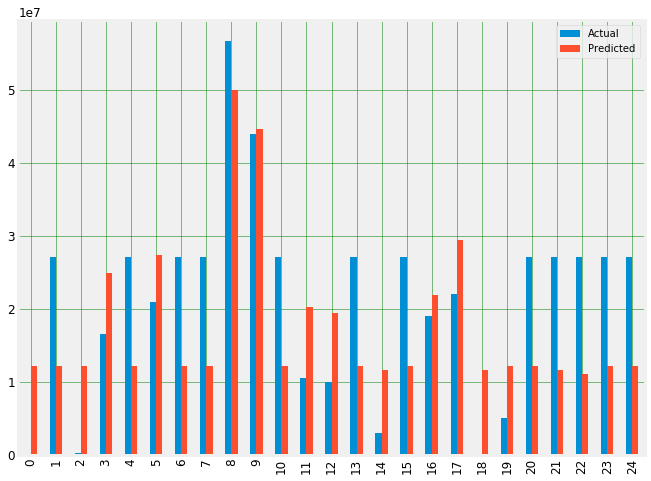

In [64]:
d8.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [65]:
#computing and displaying the mean absolute error
print('Mean Absolute Error:', round(metrics.mean_absolute_error(Y1_test, Y1_pred)))


Mean Absolute Error: 11981150.0


In [66]:
#
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm

lr = LinearRegression()
lr.fit(new[["funding_rounds"]+["debt_financing"]+["private_equity"]+["round_A"]+["round_B"]+["round_C"]+["round_D"]+["round_F"]], new[["amount_raised"]])
predictions = lr.predict(new[["funding_rounds"]+["debt_financing"]+["private_equity"]+["round_A"]+["round_B"]+["round_C"]+["round_D"]+["round_F"]])
model = sm.ols(formula='amount_raised ~ funding_rounds+debt_financing+private_equity+round_A+round_B+round_C+round_D+round_E+round_F', data=new)
fitted1 = model.fit()
fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          amount_raised   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     3064.
Date:                Sun, 03 May 2020   Prob (F-statistic):               0.00
Time:                        20:47:03   Log-Likelihood:                -15509.
No. Observations:                 849   AIC:                         3.104e+04
Df Residuals:                     839   BIC:                         3.108e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.586e+07   1.47e+06     10.812      0.000     1.3e+07    1.87e+07
funding_rounds -9.506e+05   9.88e+05     -0.962      0.336   -2.89e+06    9.88e+05
debt_financing     0.9928      0.009    108.548      0.000       0.975       1.011
private_equity     0.7787      0.025     30.929      0.000       0.729       0.828
round_A           -0.1928      0.265     -0.727      0.468      -0.714       0.328
round_B            0.5166      0.142      3.629      0.000       0.237       0.796
round_C            0.8614      0.183      4.703      0.000       0.502       1.221
round_D            1.0448      0.093     11.193      0.000       0.862       1.228
round_E            5.3888      0.138     39.073      0.000       5.118       5.659
round_F            0.6545      0.206      3.182      0.002       0.251       1.058
==============================================================================
Omnibus:                      360.352   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            84319.011
Skew:                          -0.689   Prob(JB):                         0.00
Kurtosis:                      51.802   Cond. No.                     1.88e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
#finding collinearity between the independent variables using the variance inflation factor test
d=new[['funding_rounds','debt_financing','private_equity','round_A','round_B','round_C','round_D','round_F']]
X = add_constant(d)
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

const             4.193646
funding_rounds    1.588858
debt_financing    1.001365
private_equity    1.181856
round_A           1.067594
round_B           1.215486
round_C           1.342405
round_D           1.629819
round_F           1.754498
dtype: float64

In [73]:
#for time period 1999-2014
#Startup name with highest funding
#Grouping by Startup and showing the Industry and sum of Amount for each startup
#Sorting values based on sum of Amount (Descending)
A1 = new.groupby(["name", "segment"], as_index = False)["amount_raised"].sum()    
A1=A1.sort_values(["amount_raised"])
A1.head()


,name,segment,amount_raised
191,Etable,Social Media,100000.0
150,DecideQuick,Social Media,100000.0
663,Travel Desiya,Travel,100000.0
213,FilmySphere Entertainment Pvt Ltd,Games,100000.0
216,FindYogi,Consumers,100000.0


In [87]:
#Cities with most fundings between 1999-2014
B1 = new.groupby(["city"], as_index = False)["amount_raised"].sum()
B1 = B1.sort_values(["amount_raised"], ascending = False)
B1.head()

,city,amount_raised
4,Bangalore,6.357187e+09
48,Mumbai,5.018490e+09
52,New Delhi,3.432407e+09
26,Gurgaon,1.720098e+09
29,Hyderabad,1.284249e+09


In [77]:
#segment wise funding between 1999-2014
D1 = new.groupby(['segment'], as_index = False)["amount_raised"].sum()
D1 = D1.sort_values(["amount_raised"], ascending = False)
D1.head(15)

,segment,amount_raised
37,E-Commerce,2.595369e+09
116,Online Shopping,2.394783e+09
33,Development Platforms,2.250580e+09
16,Clean Technology,1.249011e+09
154,Software,1.153938e+09
101,Mobile,1.016243e+09
39,Education,7.478330e+08
50,Finance,7.140215e+08
20,Consulting,6.353145e+08
29,Curated Web,6.011642e+08


In [84]:
#Investment round funding between 1999-2014
sum_column=new.sum(axis=0)
sum_column[6:].sort_values(ascending=False)

venture                 8626954003
private_equity          3234504313
debt_financing          2720171106
round_B                 1131896734
round_G                 1060000000
round_D                  760000000
round_C                  672943477
round_A                  651813158
round_E                  610000000
round_H                  600000000
round_F                  433700000
undisclosed              140453286
post_ipo_equity          125000000
seed                      96268035
angel                     37481000
grant                     25980000
convertible_note           4431000
first_funding_year         1708003
product_crowdfunding        250000
secondary_market            210000
equity_crowdfunding           8000
first_funding_month           5507
post_ipo_debt                    0
dtype: object